# Tutorial de Proyecto de analisis exploratorio de datos (EDA)

- Descarga los datos de Airbnb de Nueva York de Kaggle.com.
- Realiza un EDA completo incluyendo todos los pasos del proceso.
- Escribe las conclusiones de cada paso y analiza los resultados sobre las relaciones entre las variables.

## 📝 Instrucciones

#### Airbnb en Nueva York
Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.
>
>
> - Paso 1: Carga del conjunto de datos
>    Puedes descargar el conjunto de datos directamente desde Kaggle.com o en el siguiente enlace: https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv. Almacena    los datos en crudo en la carpeta ./data/raw.
>
> - Paso 2: Realiza un EDA completo
>Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.
>
> - Paso 3: Guarda el conjunto de datos procesado
> Después del EDA puedes guardar los datos en la carpeta ./data/processed. Asegúrate de agregar la carpeta de los datos en el .gitignore. Los datos al igual que los modelos no se deben > subir a git.
>

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.


## Imports

In [149]:
import ipyleaflet
import ipywidgets
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
import cv2
import pandas as pd
import psycopg2
import pymysql
import dotenv
import requests
import sklearn
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
import sqlalchemy
import sympy
import xgboost


## Paso 1: Definición del problema

#### ¿Que influye en los precios de nuestro data?

## Paso 2: Recopilación de datos

Recopilamos la informacion de nuestro DataSet

In [150]:
df = pd.read_csv("../data/raw/AirBnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Paso 3: Análisis Descriptivo

#### Analizamos nuestros datos del DataSet, asi podremos observar con que datos contamos

In [151]:
df.shape

(48895, 16)

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [154]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [155]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

> ### Observaciones:
>
> 
> - Existen un total de 48895 filas y 16 columnas, entre las cuales encontramos el target o clase a predecir, `price`.
> - La variable `last_review` tiene 10052 valores nulos.
> - La variable `reviews_per_month` tiene 10052 valores nulos.
> - La variable `host_name ` y `name` también cuenta con valores nulos, pero en un número mucho más reducido que los anteriores.
> - El resto de variables cuentan siempre con valor.
> - Los datos cuentan con 10 características numéricas y 6 características categóricas.

## Paso 4: Limpieza de Datos

### Buscamos valores duplicados:

In [156]:
df.duplicated().sum()

np.int64(0)

#### Observaciones:

No encontramos valores duplicados.

### Limpieza de datos: Eliminar información irrelevante

#### Buscamos que informacion es irrelevante para nosotros y asi proceder a eliminarla

In [157]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Eliminacion de columnas innecesarias:

Nos aseguramos de hacer una copia para asi no perder el df original.

In [158]:
df_copy = df.copy()
df_copy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [159]:
df_copy.drop(["id", "name", "host_id", "host_name", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count"], axis=1, inplace=True)
df_copy

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,2


#### Observaciones

- Eliminamos las columnas `id`, `name`, `host_id`, `host_name`, `number_of_reviews`, `last_review`, `reviews_per_month`, `calculated_host_listings_count` ya que esto nos aporta informacion del Host y no del inmueble
lo cual no va inferir en el precio de alquiler.

In [160]:
df= df.rename(columns={ 'neighbourhood_group': 'district'})
df

,id,name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [161]:
df_copy = df_copy.rename(columns={ 'neighbourhood_group': 'district', })
df_copy


,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,2


#### Observaciones
- Cambio el nombre de `neighbourhood_group` a `district` para no dar lugar a confusiones, ya que hablando de New York, se trata de distritos y no de grupos de barrios.

## Paso 5: Análisis de Variables

### Análisis de Variables Univariante

### Análisis de Variables Univariante Categóricas

In [162]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   district          48895 non-null  object 
 1   neighbourhood     48895 non-null  object 
 2   latitude          48895 non-null  float64
 3   longitude         48895 non-null  float64
 4   room_type         48895 non-null  object 
 5   price             48895 non-null  int64  
 6   minimum_nights    48895 non-null  int64  
 7   availability_365  48895 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.0+ MB


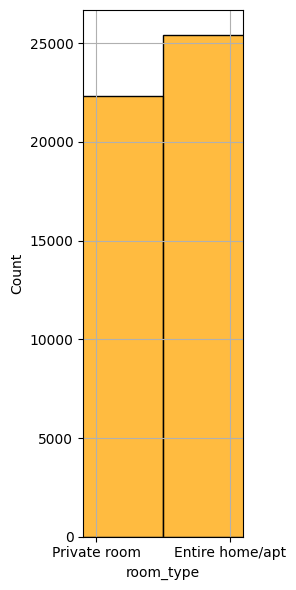

In [163]:
fig = plt.figure(figsize=(3,6))
sns.histplot(data=df_copy, x="room_type", color="orange").set_xlim(-0.1, 1.1)
plt.grid()
plt.tight_layout()
plt.show()

#### Observaciones

Con la representación de la variable podemos determinar que:

- **room_type**: El número de personas que eligieron "Entire home/apt" supera los 25000 para ser exactos (25409) a los que solo eligieron "private_room" que fueron más de 22000 (22236).
- Por otro lado tuvimos un número muy reducido de personas que eligieron la opcion de "room shared" los cuales fueron apenas unas 1160 personas.


In [164]:
cuenta_room =((df_copy['room_type'] == "Private room")).sum()
cuenta_room

np.int64(22326)

In [165]:
cuenta_apt =((df_copy['room_type'] == "Entire home/apt")).sum()
cuenta_apt

np.int64(25409)

In [166]:
cuenta_shared =((df_copy['room_type'] == "Shared room")).sum()
cuenta_shared

np.int64(1160)

In [167]:
total_cuentas = cuenta_apt + cuenta_room + cuenta_shared
total_cuentas

np.int64(48895)

In [168]:
df_copy['room_type'].shape

(48895,)

### Análisis de Variables Univariante Numéricas


Antes de comenzar a graficar, debemos también identificar cuáles son las numéricas, que son `latitude`, `longitude`, `price`, `minimum_nights` y `availability_365`.

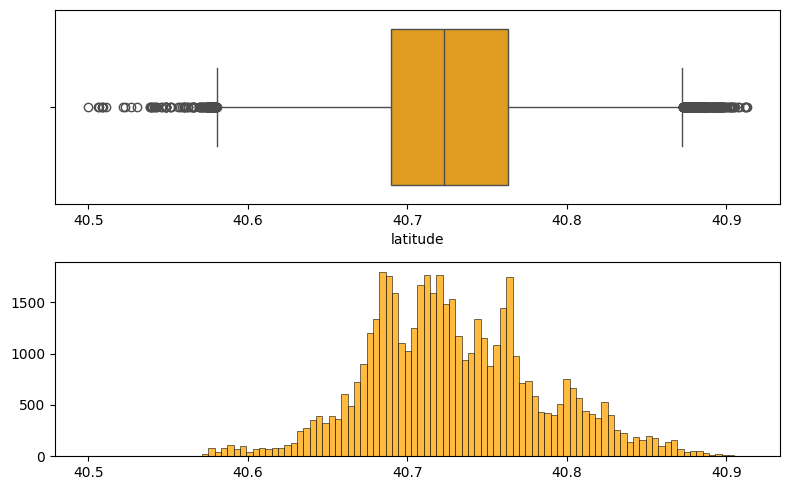

In [169]:
fig, axis = plt.subplots(2,1, figsize=(8, 5))
# Crear una figura múltiple con histogramas y diagramas de caja
sns.boxplot(ax=axis[0],data=df, x="latitude", color="orange")
sns.histplot(ax=axis[1],data=df, x="latitude", color="orange").set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

#### Observaciones

- La combinacion de los dos graficos nos permite conocer las distribuciones y sus caracteristicas estadisticas.
- De la visualizacion resultante podemos tener en claro que todo valor por debajo de 40.58 o por encima de 40.87 es atípico.
- La distribución es casi simétrica, con un sesgo leve hacia la derecha.

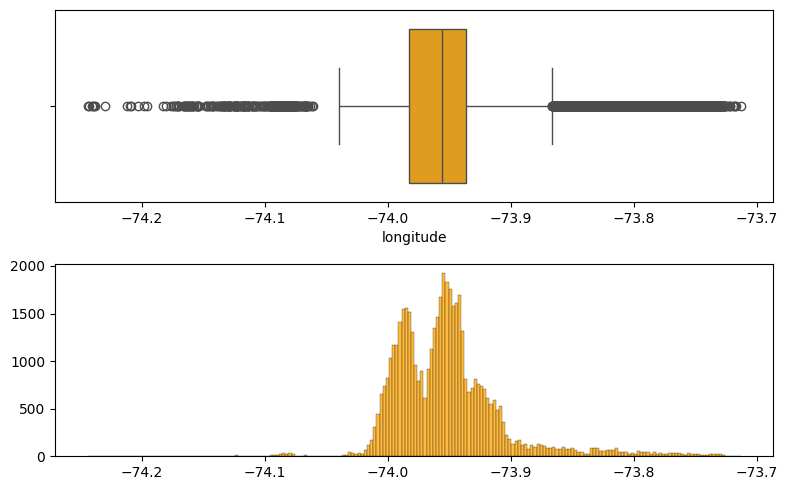

In [170]:
fig, axis = plt.subplots(2,1, figsize=(8, 5))
sns.boxplot(ax=axis[0],data=df_copy, x="longitude", color="orange")
sns.histplot(ax=axis[1],data=df_copy, x="longitude", color="orange").set(xlabel=None, ylabel=None)
plt.tight_layout()
plt.show()

#### Observaciones

- La combinacion de los dos graficos nos permite conocer las distribuciones y sus caracteristicas estadisticas.
- De la visualizacion resultante podemos tener en claro que la variable tiene bastantes valores atípicos en ambos extremos, aunque más concentrados a la izquierda.
- Las distribucion tiene asimetria, tiene sesgo positivo, con una cola más larga hacia valores mayores (menos negativos).

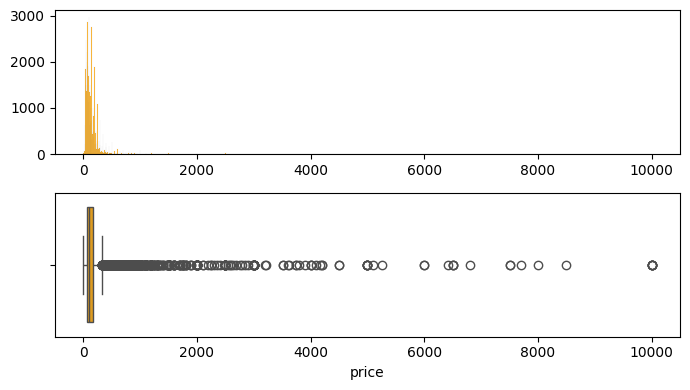

In [171]:
fig, axis = plt.subplots(2,1, figsize=(7, 4))
sns.boxplot(ax=axis[1],data=df_copy, x="price", color="orange")
sns.histplot(ax=axis[0],data=df_copy, x="price", color="orange").set(xlabel=None, ylabel=None)
plt.tight_layout()
plt.show()


#### Observaciones

- La combinacion de los dos graficos nos permite conocer las distribuciones y sus caracteristicas estadisticas.
- De la visualizacion resultante podemos tener en claro que hay muchos valores atípicos extremos, probablemente precios poco realistas o propiedades de lujo muy escasas.
- La distribución está muy concentrada en valores pequeños y tiene una cola larga hacia la derecha.

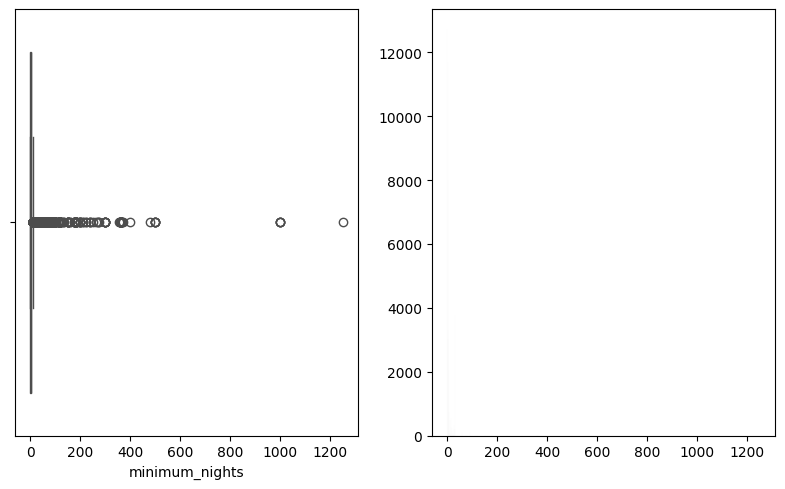

In [172]:
fig, axis = plt.subplots(ncols=2, figsize=(8, 5), gridspec_kw={'height_ratios': [2]})
sns.boxplot(ax=axis[0], data=df_copy, x="minimum_nights", color="orange")
sns.histplot(ax=axis[1], data=df_copy, x="minimum_nights", color="orange").set(xlabel=None, ylabel=None)
plt.tight_layout()
plt.show()


#### Observaciones

- La combinacion de los dos graficos nos permite conocer las distribuciones y sus caracteristicas estadisticas.
- De la visualizacion resultante podemos tener en claro que muchos anuncios fijan pocas noches mínimas, pero hay valores muy altos que parecen anomalías (100+, 500+, 1200 noches).
- La variable es claramente asimétrica y contiene valores atípicos extremos.

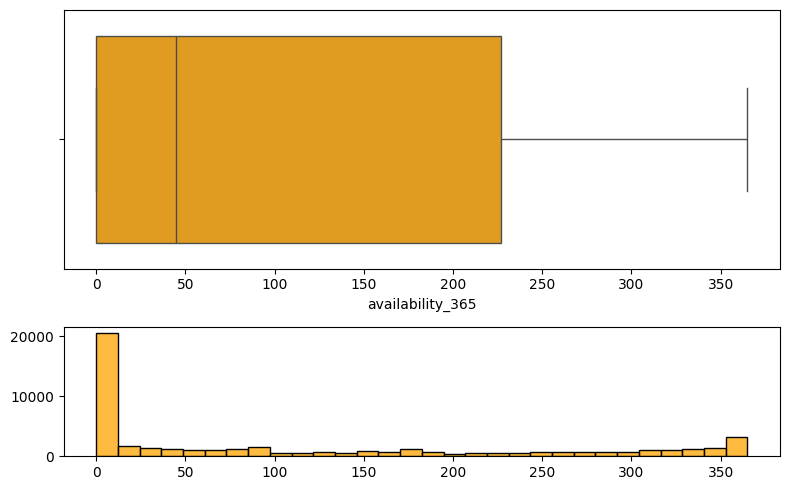

In [173]:
fig, axis = plt.subplots(2,1, figsize=(8, 5), gridspec_kw={'height_ratios': [2, 1]})
sns.boxplot(ax=axis[0],data=df_copy, x="availability_365", color="orange")
sns.histplot(ax=axis[1],data=df_copy, x="availability_365", color="orange").set(xlabel=None, ylabel=None)
plt.tight_layout()
plt.show()

##### Observaciones

- La combinacion de los dos graficos nos permite conocer las distribuciones y sus caracteristicas estadisticas.
- Hay concentración de valores en 0, en pequeños números, y otro grupo en 365, lo cual sugiere dos comportamientos diferentes:

    1. Propiedades muy reservadas (baja disponibilidad).

    2. Propiedades casi no reservadas (alta disponibilidad).
- Presenta asimetría a la derecha, pero menos severa que en las otras variables.

### Análisis de Variables Multivariante

In [174]:
df_copy

,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,2


Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación de ciertos valores no perjudiciales para nuestro objetivo a investigar.

Por ejemplo, la variable `last_review` y `reviews_per_month` tienen muchos valores nulos, y tendríamos que asegurar que no hay relación entre ella y `price` antes de eliminarla, ya que quizá pudiera ser muy significativa e importante para el modelo y su presencia podría decantar la predicción.

#### Análisis numérico-numérico

Cuando las dos variables que se comparan tienen datos numéricos, se dice que el análisis es numérico-numérico. Para comparar dos columnas numéricas se utilizan:

- diagramas de dispersión.
- análisis de correlaciones:
  1. correlación = 1 o -1 puede ser dependientes o existir una relación.
  2. correlación = 0, son independientes.

### price - (longitude, latitude, minimum_nights, availability_365)

Utilizaremos la variable `price` para comenzar con el análisis bivariante porque al tratarse de una variable continua codificada en números.

Primero analizamos el target frente a las características numéricas:

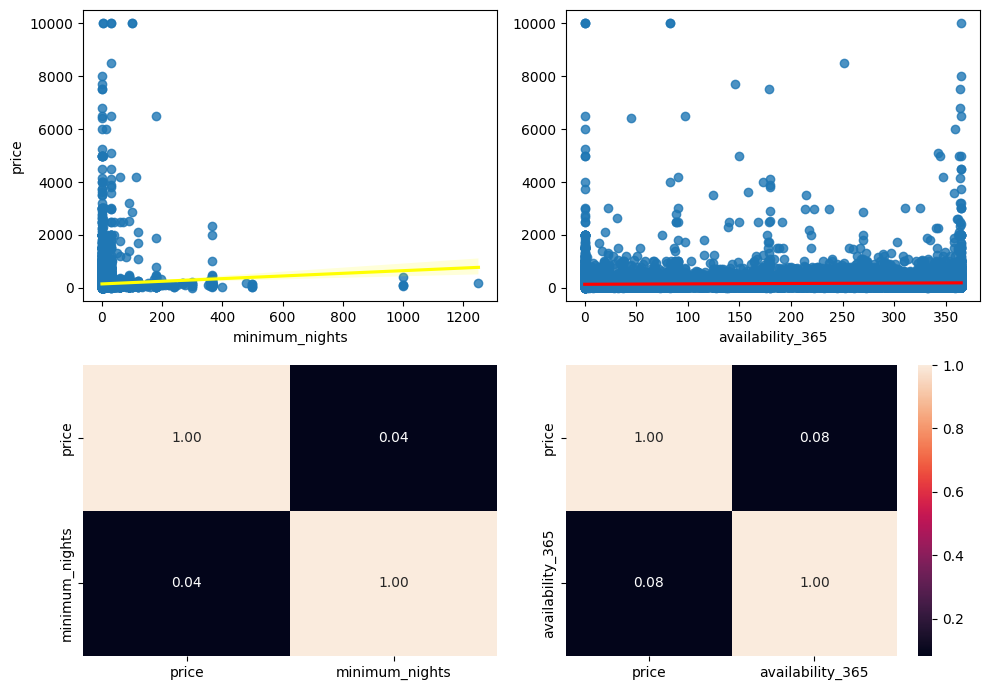

In [175]:
# Generamos las correlaciones
corr_price_minimum_nights = df_copy[["price", "minimum_nights"]].corr()
corr_price_availability_365 = df_copy[["price", "availability_365"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df_copy, x="minimum_nights", y="price", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_minimum_nights, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df_copy, x="availability_365", y="price", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_availability_365, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

**Conclusión general**

- Ni el mínimo de noches ni la disponibilidad anual explican bien el precio.
- Hay una ligera tendencia a precios más altos en alojamientos más disponibles o con estancias mínimas más largas.


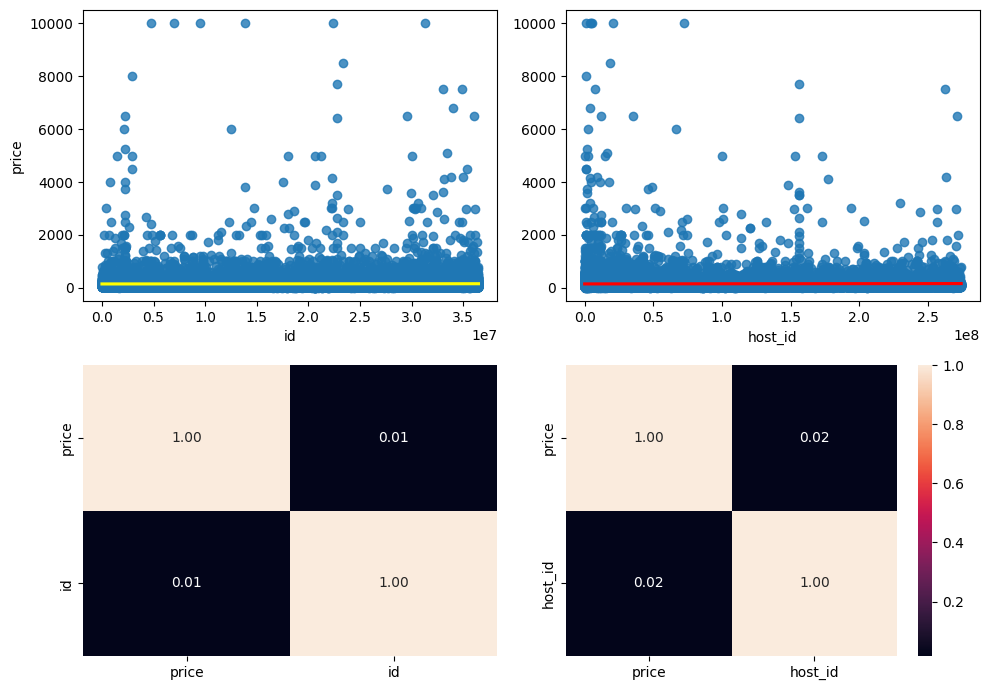

In [176]:
# Generamos las correlaciones
corr_price_id = df[["price", "id"]].corr()
corr_price_host_id= df[["price", "host_id"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="id", y="price", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_id, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="host_id", y="price", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_host_id, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

**Conclusión general**

- Los identificadores (id, host_id) son útiles para identificar registros, pero no aportan valor predictivo sobre el precio.

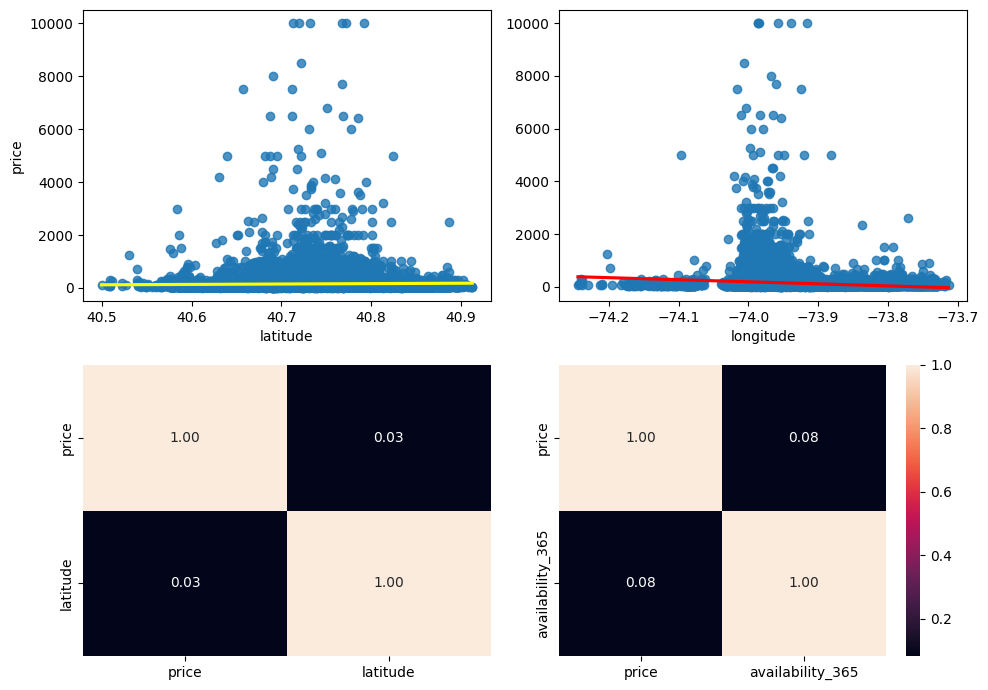

In [177]:
# Generamos las correlaciones
corr_price_latitude = df_copy[["price", "latitude"]].corr()
corr_price_longitude = df_copy[["price", "availability_365"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df_copy, x="latitude", y="price", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_latitude, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df_copy, x="longitude", y="price", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_longitude, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

**Conclusión general**
- Ubicación geográfica (latitud y longitud) no parece tener una influencia fuerte sobre el precio.

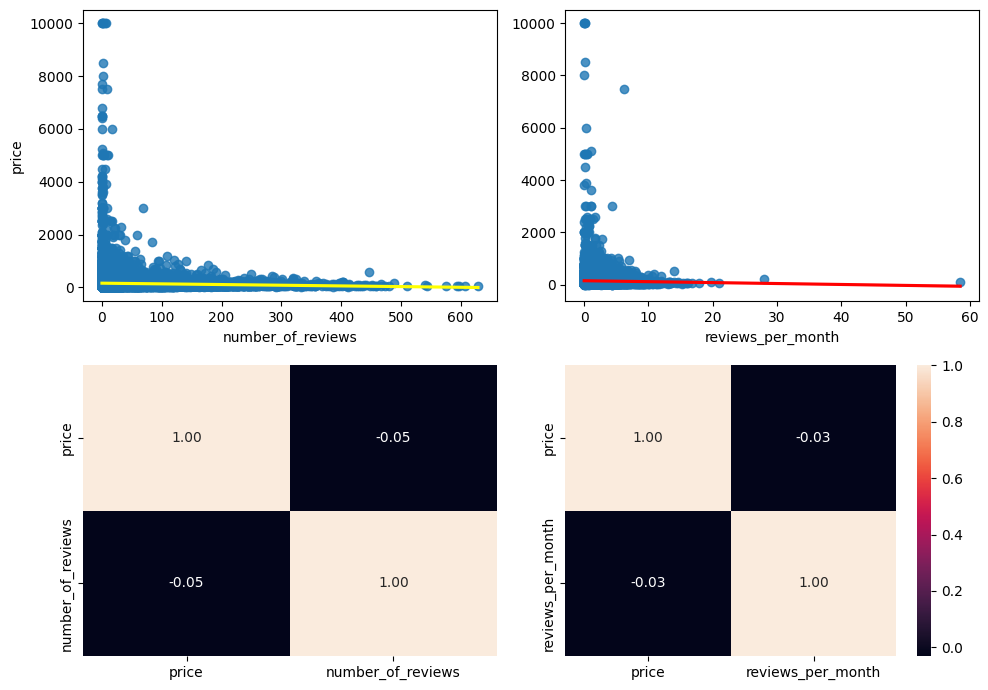

In [178]:
# Generamos las correlaciones
corr_price_number_of_reviews = df[["price", "number_of_reviews"]].corr()
corr_price_reviews_per_month = df[["price", "reviews_per_month"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="number_of_reviews", y="price", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_number_of_reviews, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="reviews_per_month", y="price", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_reviews_per_month, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

**Conclusión general**
- Los gráficos muestran que ni el número de reseñas ni la frecuencia mensual de reseñas explican bien el precio.
- Hay outliers (precios muy altos) que podrían distorsionar la percepción.


#### Observacion

Vamos a averiguar si las variables 'last_review' y 'reviews_per_month' tienen alguna correlacion antes de descartarlas por completo.

para ello, vamos a convertir su valor en un valor de datatime para poder manejarlos en numeros.

In [179]:
# Convertir a datetime
df["last_review"] = pd.to_datetime(df["last_review"])
df["last_review"] = df["last_review"].astype("int64") // 10**9   # timestamp en segundos

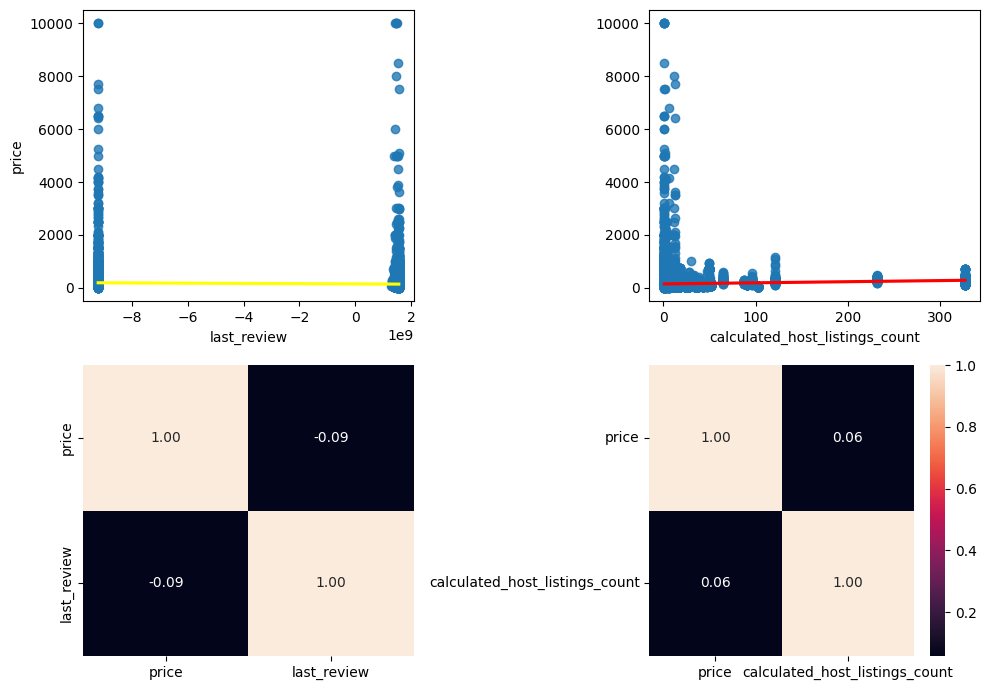

In [180]:
# Generamos las correlaciones
corr_price_last_review = df[["price", "last_review"]].corr()
corr_price_calculated_host_listings_count = df[["price", "calculated_host_listings_count"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="last_review", y="price", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_price_last_review, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="calculated_host_listings_count", y="price", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_price_calculated_host_listings_count, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

**Conclusión general**
- Las correlaciones son débiles, lo que sugiere que ni la fecha de la última reseña ni la frecuencia de reseñas por mes explican bien el precio.
- El análisis visual ayuda a detectar patrones que podrían no ser evidentes solo con estadísticas.

Por lo tanto procederemos a descartarlas.


### Análisis categórico-categórico

Cuando las dos variables que se comparan tienen datos categóricos, se dice que el análisis es categórico-categórico. Para comparar dos columnas numéricas se utilizan histogramas y combinaciones.

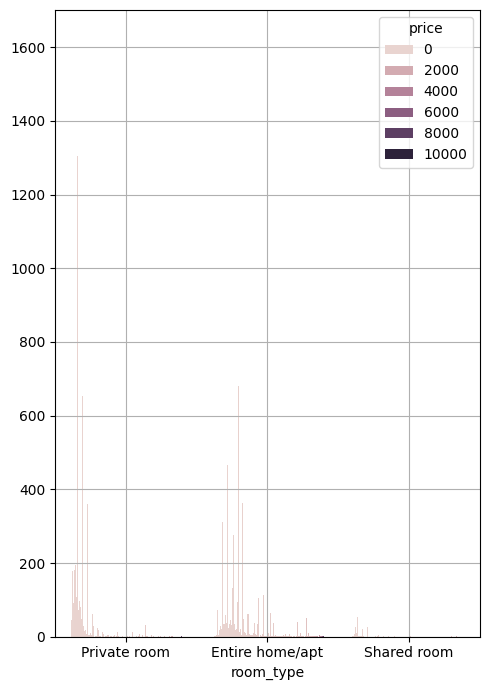

In [181]:
fig = plt.subplots(figsize=(5, 7))
sns.countplot(data=df, x="room_type", hue='price').set(ylabel=None)
plt.grid()
plt.tight_layout()
plt.show()

 ##### Observaciones:

 Del gráfico anterior podemos obtener las siguientes conclusiones:

 - La preferencia por alojamientos privados o completos es clara. Esto puede deberse a la comodidad, privacidad o expectativas de los viajeros.
 
- Las habitaciones compartidas podrían estar más presentes en contextos muy económicos o en alojamientos tipo hostal.

- Apartamentos completos son los más numerosos y están distribuidos en todos los rangos de precio, incluyendo los más altos. Esto sugiere que este tipo de alojamiento tiene una gran variedad de precios y es el más ofertado.

- Habitaciones privadas también tienen una presencia fuerte, pero con menos variedad en precios altos.

- Habitaciones compartidas son las menos comunes y casi todas están en rangos de precio bajos.


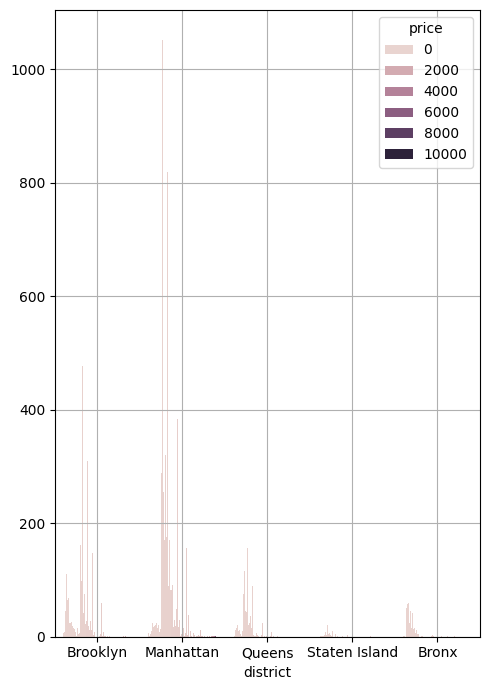

In [182]:
fig = plt.subplots(figsize=(5, 7))
sns.countplot(data=df, x="district", hue='price').set(ylabel=None)
plt.tight_layout()
plt.grid()
plt.show()

 ##### Observaciones:

 Del gráfico anterior podemos obtener las siguientes conclusiones:

- Alta concentración en Brooklyn y Manhattan: Esto puede deberse a que son zonas más turísticas, céntricas o con mayor densidad urbana.

- Menor oferta en Bronx y Staten Island: Podría reflejar menor demanda turística, menor densidad de alojamientos registrados, o características residenciales distintas.

- Brooklyn y Manhattan tienen la mayor cantidad de apartamentos, y además están distribuidos en todos los rangos de precio, incluyendo los más altos. Esto indica una gran diversidad de oferta.

- Queens tiene menos apartamentos, y la mayoría están en rangos de precio más bajos.

- Staten Island y Bronx tienen la menor cantidad de apartamentos, y casi todos están en los rangos más económicos.


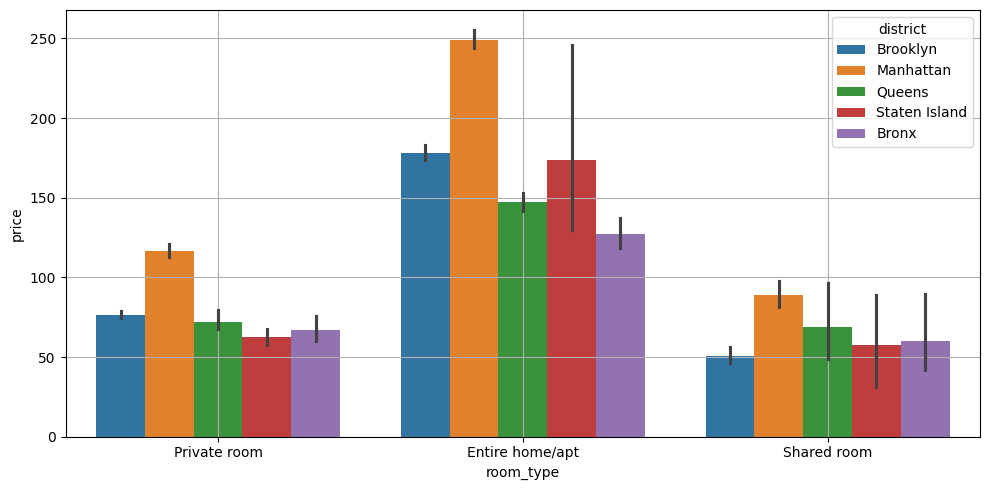

In [183]:
fig= plt.subplots(figsize=(10, 5))
sns.barplot( data=df, x="room_type", y="price", hue="district")
plt.tight_layout()
plt.grid()
plt.show()

 ##### Observaciones:

Del gráfico anterior podemos obtener las siguientes conclusiones:

- Manhattan tiene los precios más altos en todas las categorías, especialmente en apartamentos completos, lo que refleja su estatus como zona premium.

- Shared rooms son los más económicos en todos los distritos, aunque Manhattan sigue siendo el más caro incluso en esta categoría.

- Private rooms tienen precios intermedios, con Manhattan y Brooklyn liderando.

- Bronx y Staten Island tienden a tener precios más bajos en todas las categorías.

### Análisis de correlaciones

El análisis multivariante también permite combinar el target con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.

Creamos columnas numéricas para nuestras variables categóricas

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   district                        48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [185]:
# Factorize antes del split sobre df completo
df_copy['district_n'], _ = pd.factorize(df['district'])
df_copy['neighbourhood_n'], _ = pd.factorize(df['neighbourhood'])
df_copy['room_type_n'], _ = pd.factorize(df['room_type'])

# Luego SOBREESCRIBES las columnas originales
df_copy['district'] = pd.factorize(df['district'])[0]
df_copy['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]
df_copy['room_type'] = pd.factorize(df['room_type'])[0]

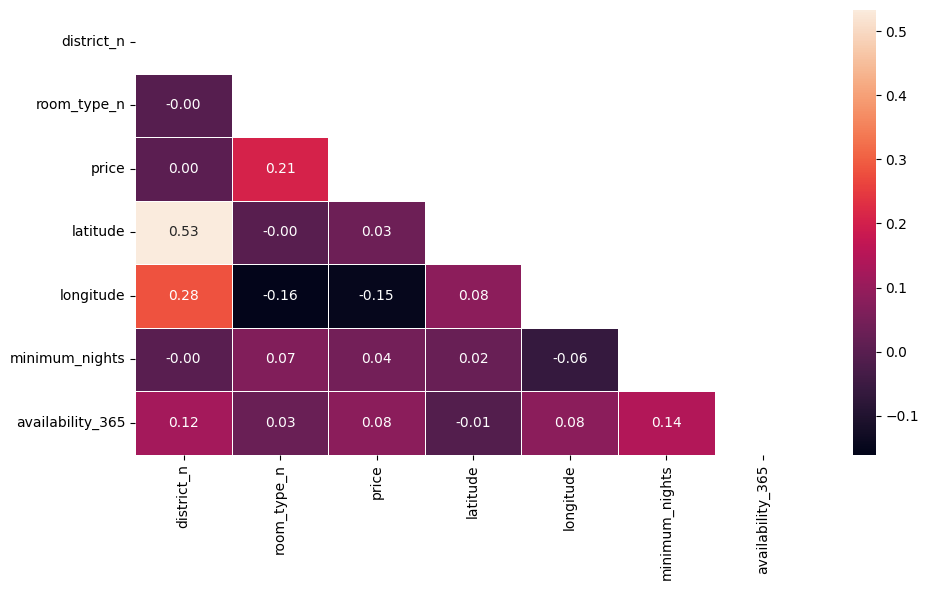

In [186]:
corr = df_copy[["district_n", "room_type_n", "price","latitude", "longitude", "minimum_nights","availability_365"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

##### Observaciones:
- La ubicación (latitud) es el factor más correlacionado con el precio, lo que indica que la zona geográfica tiene un impacto importante en el valor del alojamiento.

- El tipo de habitación también influye, aunque en menor medida.

- Variables como disponibilidad o noches mínimas tienen muy poca relación con el precio, por lo que no serían buenos predictores en un modelo.


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   district                        48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

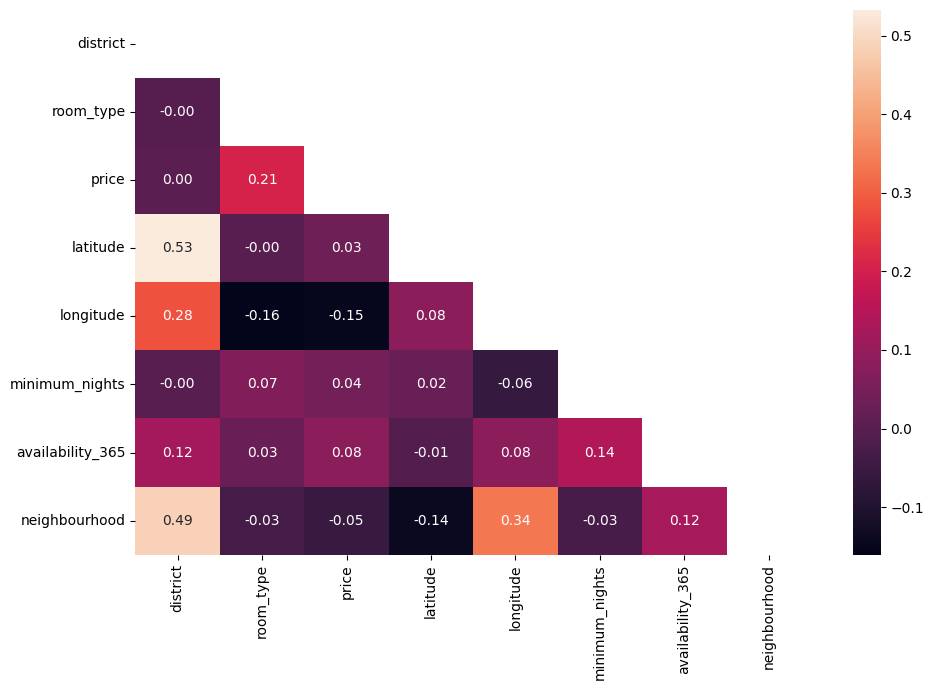

In [188]:
corr = df_copy[["district", "room_type", "price","latitude", "longitude", "minimum_nights","availability_365", "neighbourhood",]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

##### Observaciones:
- La ubicación geográfica (latitud y longitud) tiene más impacto en el precio que otras variables.

- El tipo de habitación también influye, aunque en menor medida.

- Variables como nombre del anfitrión o del anuncio no tienen relación significativa con el precio.


Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

KeyError: 'district_n'

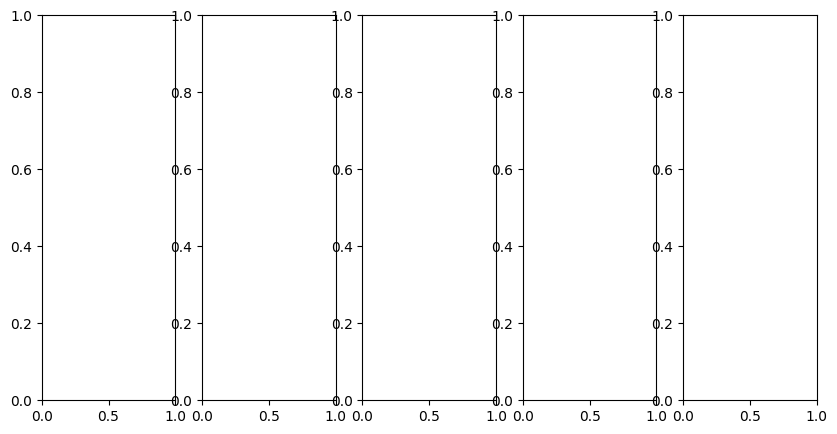

In [189]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=5)

sns.regplot(ax=axis[0], data=df, x="district_n", y="price")
sns.regplot(ax=axis[1], data=df, x="neighbourhood_n", y="price")
sns.regplot(ax=axis[2], data=df, x="room_type_n", y="price")
sns.regplot(ax=axis[3], data=df, x="minimum_nights", y="price")
sns.regplot(ax=axis[4], data=df, x="availability_365", y="price")

plt.tight_layout()
plt.show()

##### Observaciones:
- El tipo de habitación (room_type_n) es el factor más claramente relacionado con el precio.

- La ubicación (district_n, neighbourhood_n) tiene influencia, pero con mucha variabilidad interna.

- Variables como minimum_nights y availability_365 tienen relaciones débiles con el precio.


## Paso 6: Ingeniería de características


#### Análisis de outliers

**Outliers: Análisis descriptivo**

Es una poderosa herramienta para caracterizar el conjunto de datos: la media, desviación y los cuartiles nos brindan una poderosa información sobre cada variable. La función `.describe()` de un DataFrame nos ayuda a calcular en unos tiempos muy reducidos todos estos valores.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2.539000e+03,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2.438000e+03,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,4.049979e+01,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-7.424442e+01,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.000000e+00,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.000000e+00,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
last_review,48895.0,-6.738687e+08,4.349375e+09,-9.223372e+09,1.458778e+09,1.546474e+09,1.560902e+09,1.562544e+09
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,1.000000e-02,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02


**Outliers: Visualización**

Dibujar los diagramas de cajas de las variables también nos da una información muy poderosa sobre los valores atípicos que se salen de las regiones de confianza:

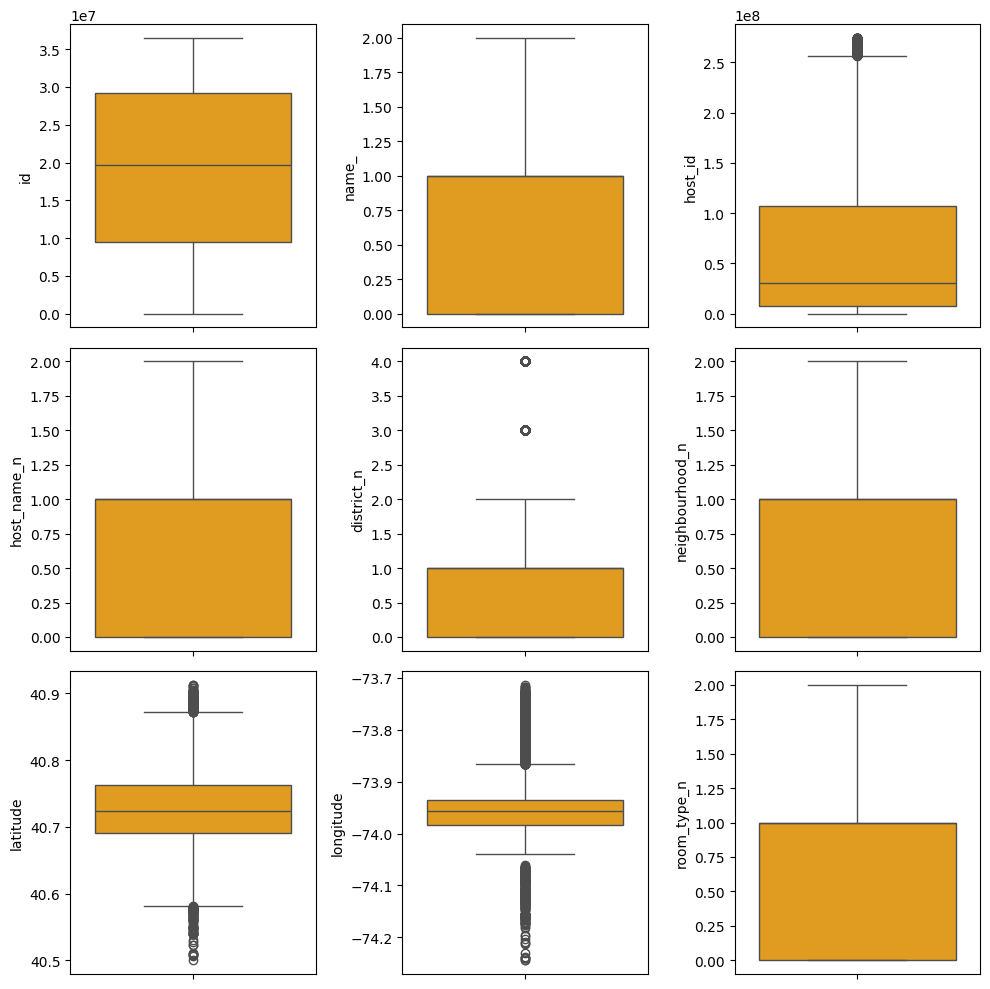

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))


sns.boxplot(ax=axis[0, 0], data=df, y="id", color='orange')
sns.boxplot(ax=axis[0, 1], data=df, y="name_", color='orange')
sns.boxplot(ax=axis[0, 2], data=df, y="host_id", color='orange')
sns.boxplot(ax=axis[1, 0], data=df, y="host_name_n", color='orange')
sns.boxplot(ax=axis[1, 1], data=df, y="district_n", color='orange')
sns.boxplot(ax=axis[1, 2], data=df, y="neighbourhood_n", color='orange')
sns.boxplot(ax=axis[2, 0],data=df, y="latitude", color='orange')
sns.boxplot(ax=axis[2, 1], data=df, y="longitude", color='orange')
sns.boxplot(ax=axis[2, 2], data=df, y="room_type_n", color='orange')

plt.tight_layout()
plt.show()

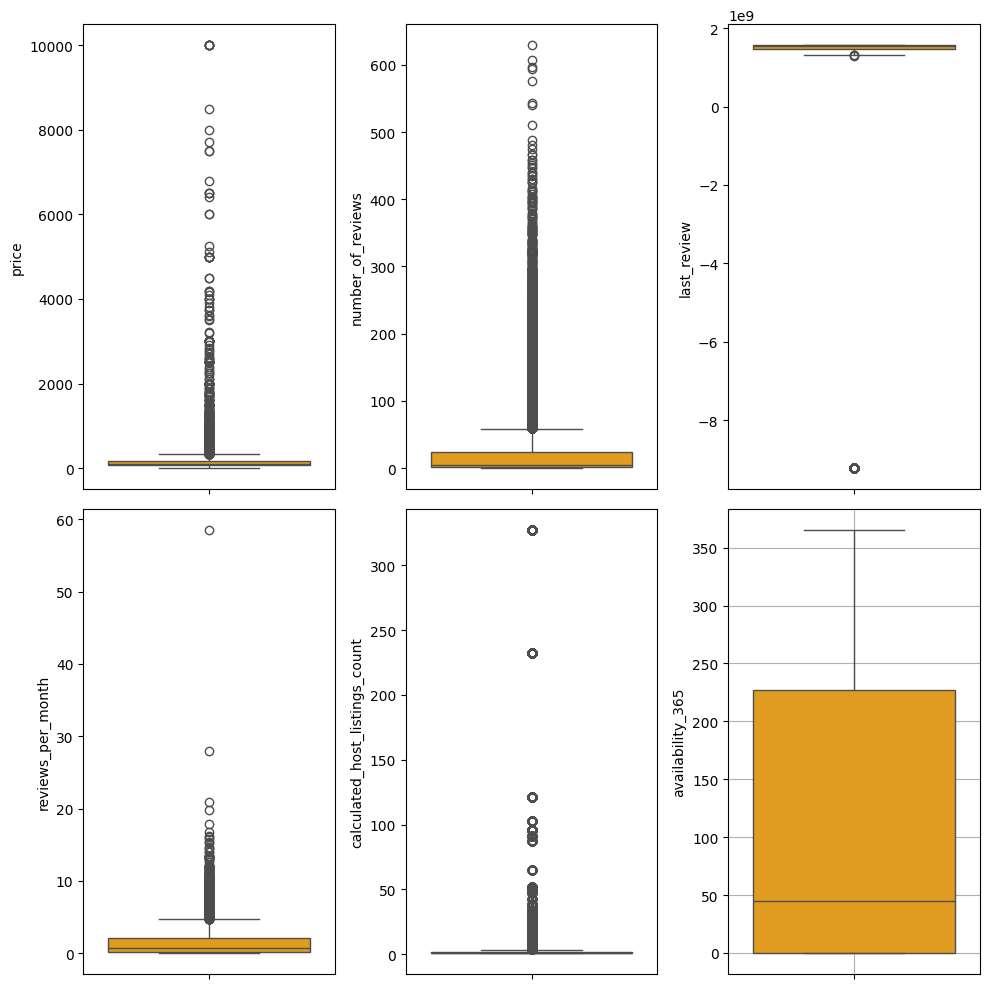

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(10, 10))



sns.boxplot(ax=axis[0, 0], data=df, y="price", color='orange')
sns.boxplot(ax=axis[0, 1], data=df, y="number_of_reviews", color='orange')
sns.boxplot(ax=axis[0, 2], data=df, y="last_review", color='orange')
sns.boxplot(ax=axis[1, 0], data=df, y="reviews_per_month", color='orange')
sns.boxplot(ax=axis[1, 1], data=df, y="calculated_host_listings_count", color='orange')
sns.boxplot(ax=axis[1, 2], data=df, y="availability_365", color='orange')
plt.grid()
plt.tight_layout()
plt.show()

##### Observaciones

Podemos encontrar:

- Detección de outliers: Puedes identificar qué variables tienen valores extremos que podrían afectar modelos.

- Preparación de datos: Saber qué variables necesitan transformación, codificación o exclusión.


#### Vemos las stats de cada variable que queremos analizar

In [ ]:
district_price = df["price"].describe().T
district_price

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 334.0, límite inferior: 0, rango intercuartílico: 106.0'

 #### Conclusión

 Basándonos en estos resultados, deberíamos eliminar los registros de los precios cuyo importe supere los 334 dólares. Sin embargo, nuestro criterio es muy importante aquí y, según los precios que vimos en el diagrama de caja, los valores más extremos están por encima de 1000. Veamos cuántos valores representan ese valor extremo de 1000:

In [ ]:
df[df["price"] > 1000]

,id,name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,district_n,room_type_n,host_name_n,neighbourhood_n,name_
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,...,30,1525478400,0.33,11,0,1,1,1,1,1
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,...,28,1537833600,0.31,4,297,1,1,1,1,1
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,...,0,-9223372037,NaN,1,365,1,0,0,0,0
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,...,0,-9223372037,NaN,1,0,1,0,0,0,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,...,59,1453939200,0.71,11,364,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,...,0,-9223372037,NaN,1,179,1,1,1,1,1
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,...,0,-9223372037,NaN,1,222,1,1,1,1,1
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,...,0,-9223372037,NaN,1,270,1,1,1,1,1
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,...,0,-9223372037,NaN,1,349,0,1,1,1,1


#### Vemos que cantidades hay por encima de 1000 dolares y en que distritos:

In [ ]:
cantidad_1 = ((df['price'] >1000) & (df['district'] == 'Manhattan')).sum()
cantidad_1

np.int64(172)

Encontramos que en Manhattan tenemos 172 alojamientos por encima de los 1000 dolares.

In [ ]:
cantidad_2 = ((df['price'] >1000) & (df['district'] == 'Brooklyn')).sum()
cantidad_2

np.int64(54)

Encontramos que en Brooklyn tenemos 54 alojamientos por encima de los 1000 dolares.

In [ ]:
cantidad_3 = ((df['price'] >1000) & (df['district'] == 'Bronx')).sum()
cantidad_3

np.int64(1)

Encontramos que en Bronx tenemos 1 alojamiento por encima de los 1000 dolares.

In [ ]:
cantidad_4 = ((df['price'] >1000) & (df['district'] == 'Queens')).sum()
cantidad_4

np.int64(10)

Encontramos que en Queens tenemos 10 alojamientos por encima de los 1000 dolares.

In [ ]:
cantidad_5 = ((df['price'] >1000) & (df['district'] == 'Staten Island')).sum()
cantidad_5

np.int64(2)

Encontramos que en Staten Island tenemos 2 alojamientos por encima de los 1000 dolares.

In [ ]:
total = cantidad_1 + cantidad_2 + cantidad_3 + cantidad_4 + cantidad_5
total

np.int64(239)

##### Encontramos que tenemos 239 alojamientos que cuestan mas de 1000 dolares la noche.

#### Observaciones

Podemos observar que, en Manhattan se encuentra la gran cantidad de alojamientos costosos o lujosas con un total de 172 alojamientos, seguida por Brooklyn con 54 alojamientos  y muy lejos tenemos a Queens con 10 alojamientos , Staten Island con 2 alojamientos y por último Bronx con 1 solo alojamiento.

## Paso 7: Split (dos métodos o enfoques)

### Primer Enfoque: Realizar cambios antes de hacer el split de datos

En este enfoque:

- Primero se escala/codifica todo el dataset
- Luego se divide en conjuntos de entrenamiento y prueba.

### Segundo Enfoque: Realizar cambios después de hacer el split de datos.

En este enfoque:

- Primero se divide el dataset en conjuntos de entrenamiento y prueba
- Luego se procesa cada conjunto por separado (escalando/codificando) usando los parámetros que se calcularon sobre el conjunto de entrenamiento.

### Realizamos el split

In [ ]:
df.shape

(48895, 16)

In [ ]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_copy.drop("price", axis=1)
y = df_copy["price"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [ ]:
X_train

,district,neighbourhood,latitude,longitude,room_type,minimum_nights,availability_365,district_n,neighbourhood_n,room_type_n
18165,1,43,40.70741,-74.00540,1,1,0,1,43,1
3883,0,76,40.61518,-73.98874,1,30,282,0,76,1
4803,0,21,40.69502,-73.90645,0,3,15,0,21,0
14900,1,68,40.73755,-73.98041,1,5,0,1,68,1
15597,1,2,40.80276,-73.94976,1,28,310,1,2,1
...,...,...,...,...,...,...,...,...,...,...
5294,1,2,40.82654,-73.94620,1,1,297,1,2,1
1726,1,11,40.73364,-74.00539,1,2,63,1,11,1
35653,4,209,40.84184,-73.84967,0,1,123,4,209,0
25720,1,19,40.72547,-73.98315,1,2,0,1,19,1


## Paso 8: Scaling & Encoding

### Scaling - Escalado de valores


#### Normalización

#### Escalado Mínimo-Máximo

In [ ]:
# TODO: Realizar el escalando con el dataset dividido (ahora lo estamos haciendo completo)
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ["district", "neighbourhood", "latitude", "longitude", "room_type", "price", "minimum_nights", 'availability_365']
min_max_features = min_max_scaler.fit_transform(df_copy[num_variables]) 

df_min_max = pd.DataFrame(min_max_features,
                          index=df.index,
                          columns=num_variables)
df_min_max

,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0.00,0.000000,0.357393,0.511921,0.0,0.0149,0.000000,1.000000
1,0.25,0.004545,0.614199,0.490469,0.5,0.0225,0.000000,0.972603
2,0.25,0.009091,0.748252,0.569257,0.0,0.0150,0.001601,1.000000
3,0.00,0.013636,0.448496,0.535649,0.5,0.0089,0.000000,0.531507
4,0.25,0.018182,0.722820,0.565324,0.5,0.0080,0.007206,0.000000
...,...,...,...,...,...,...,...,...
48890,0.00,0.027273,0.432502,0.554109,0.0,0.0070,0.000801,0.024658
48891,0.00,0.095455,0.488906,0.585684,0.0,0.0040,0.002402,0.098630
48892,0.25,0.009091,0.762117,0.556517,0.5,0.0115,0.007206,0.073973
48893,0.25,0.031818,0.623612,0.476639,1.0,0.0055,0.000000,0.005479


In [ ]:
df_min_max.columns

Index(['district', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'availability_365'],
      dtype='object')

### Encoding - Codificación de variables categóricas

#### Label Encoding


In [ ]:
# 0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# 1. Creamos las instancias del encoder
label_encoder_room_type = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_room_type.fit(X_train['room_type'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['room_type_le'] = label_encoder_room_type.transform(X_train['room_type'])
X_test_cat_le['room_type_le'] = label_encoder_room_type.transform(X_test['room_type'])


# 1. Creamos las instancias del encoder
label_encoder_district = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_district.fit(X_train['district'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['district_le'] = label_encoder_district.transform(X_train['district'])  # 3.1 train
X_test_cat_le['district_le'] = label_encoder_district.transform(X_test['district'])  # 3.2 test


X_train_cat_le.head()

,id,name,host_id,host_name,district,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_le,district_le
18165,14218795,Spacious 1BR with amazing rooftop,1815738,Emily,Manhattan,Financial District,40.70741,-74.00540,Entire home/apt,1,0,-9223372037,NaN,1,0,0,2
3883,2381302,"New 1-Bdrm, 3-beds in Bensonhurst, Brooklyn, NY",12126255,Elska,Brooklyn,Bensonhurst,40.61518,-73.98874,Entire home/apt,30,28,1541548800,0.44,1,282,0,1
4803,3404472,Charming Boutique Room in Bushwick,17169449,Kip,Brooklyn,Bushwick,40.69502,-73.90645,Private room,3,225,1561852800,3.70,1,15,1,1
14900,11827224,"2 BR, 24-hour doorman, Gramercy",16058022,Jackie,Manhattan,Gramercy,40.73755,-73.98041,Entire home/apt,5,1,1461283200,0.03,1,0,0,2
15597,12563738,Beautiful spacious brownstone in Central Harlem,10312167,Razia,Manhattan,Harlem,40.80276,-73.94976,Entire home/apt,28,53,1551571200,1.40,2,310,0,2


#### One-Hot Encoding

In [ ]:
# Genero una lista con los nombres de las columnas categóricas
cat_variables = ["room_type", "district",]

# Creamos la instancia del encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Entrenamos el encoder con los datos de entrenamiento (ajustamos)
onehot_encoder.fit(X_train[cat_variables])

# Aplicamos el encoder en el conjunto de entrenamiento: X_train
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,
                               index=X_train.index,
                               columns=onehot_encoder.get_feature_names_out(cat_variables))

# Aplicamos el encoder en el conjunto de test: X_test
X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,
                              index=X_test.index,
                              columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,district_Bronx,district_Brooklyn,district_Manhattan,district_Queens,district_Staten Island
18165,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3883,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4803,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
14900,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15597,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Guardando los scalers & encoders

In [ ]:
# Guardamos utilizando Pickle (que nos permite guardar objetos de Python)
with open('/workspaces/machine-learning-elius123ef/data/raw/AirBnb.csv-one-hot-encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

## Paso 9: Selección de características

In [ ]:
selection_model = SelectKBest(f_classif, k=5)


# Entreno el modelo mediante fit()
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
# Aplico el modelo a los datos X_train y X_test
selection_model_transform_train = selection_model.transform(X_train)
selection_model_transform_test = selection_model.transform(X_test)

# Genero los dataframes
X_train_sel = pd.DataFrame(selection_model_transform_train, columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model_transform_test, columns=X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood,longitude,room_type,minimum_nights,availability_365
0,0.195455,0.449768,0.5,0.000000,0.000000
1,0.345455,0.481117,0.5,0.023219,0.772603
2,0.095455,0.635963,0.0,0.001601,0.041096
3,0.309091,0.496792,0.5,0.003203,0.000000
4,0.009091,0.554466,0.5,0.021617,0.849315
